In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import folium
import numpy as np

In [2]:
df = pd.read_csv("./데이터/아파트 가격/공시지가.csv")

In [3]:
df = df.drop("Unnamed: 0", axis =1)

In [10]:
df["기준년월"].unique()

array(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
       '1994-01-01', '1995-01-01', '1997-01-01', '1996-01-01',
       '1998-01-01', '1999-01-01', '2000-01-01', '2000-09-01',
       '2001-01-01', '2001-05-01', '2001-09-01', '2002-01-01',
       '2002-07-01', '2003-01-01', '2003-07-01', '2005-01-01',
       '2005-07-01', '2004-01-01', '2004-07-01', '2006-01-01',
       '2006-07-01', '2007-01-01', '2007-07-01', '2008-01-01',
       '2008-07-01', '2009-01-01', '2009-07-01', '2010-01-01',
       '2010-07-01', '2011-01-01', '2011-07-01', '2012-01-01',
       '2012-07-01', '2013-01-01', '2013-07-01', '2014-01-01',
       '2014-07-01', '2015-01-01', '2015-07-01', '2016-01-01',
       '2016-07-01', '2017-01-01', '2017-07-01', '2018-01-01',
       '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01',
       '2021-01-01', '2021-07-01', '2022-01-01'], dtype=object)

In [4]:
df_f = df.copy()

In [5]:
plt.rc('font', family='Malgun Gothic')

In [6]:
df_f = df[df["기준년월"] == "2022-01-01"]

In [14]:
df_f.iloc[:,1]

30385789    하월곡동
30385790    하월곡동
30385791    하월곡동
30385792    하월곡동
30385793    하월곡동
            ... 
31289562     종암동
31289563     종암동
31289564     종암동
31289565     종암동
31289566     종암동
Name: 법정동명, Length: 903778, dtype: object

In [16]:
df_f

,시군구명,법정동명,공시지가(원/㎡),기준년월
30385789,성북구,하월곡동,4837000,2022-01-01
30385790,성북구,하월곡동,5544000,2022-01-01
30385791,성북구,하월곡동,3605000,2022-01-01
30385792,성북구,하월곡동,3136000,2022-01-01
30385793,성북구,하월곡동,3245000,2022-01-01
...,...,...,...,...
31289562,성북구,종암동,3765000,2022-01-01
31289563,성북구,종암동,3485000,2022-01-01
31289564,성북구,종암동,6850000,2022-01-01
31289565,성북구,종암동,4125000,2022-01-01


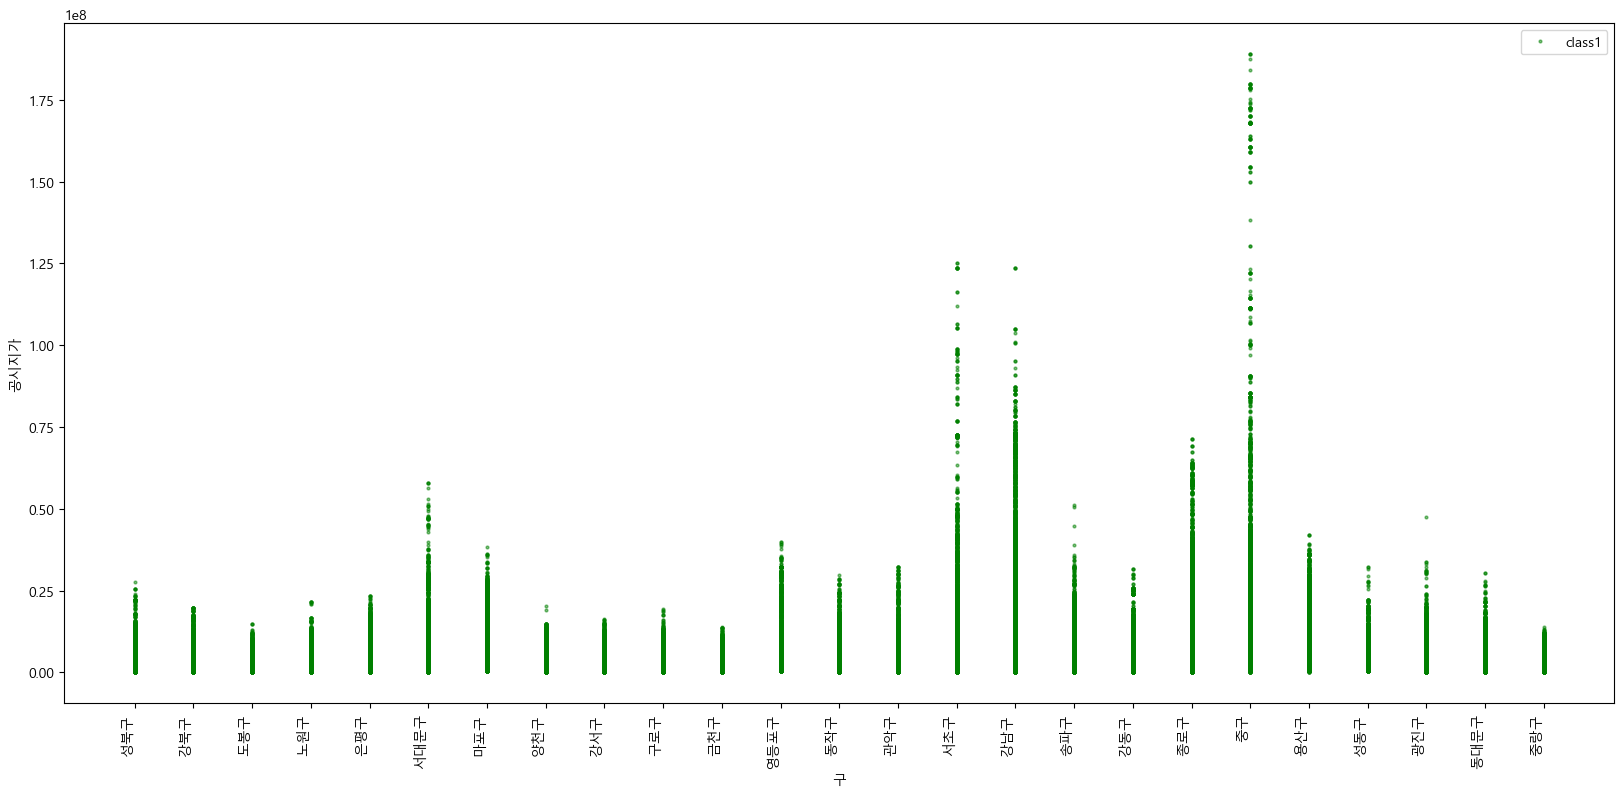

In [7]:
#시계열 고려해서 해야함

fig = plt.figure(figsize=(20,10))
X = df_f

plt.plot(  X.iloc[:,0]
         , X.iloc[:,2]
         , 'o'
         , markersize=2
         , color='green'
         , alpha=0.5
         , label='class1'
        )

plt.xlabel('구')
plt.ylabel('공시지가')
plt.xlabel('구', fontsize=10)
fig.autofmt_xdate(rotation=90)

plt.legend()
plt.show()

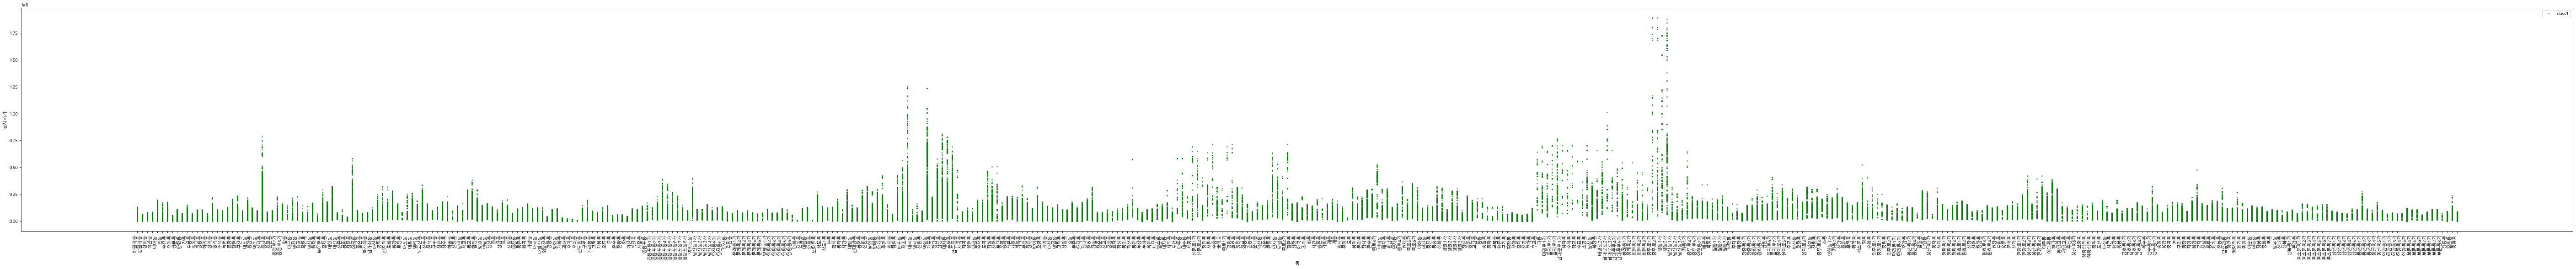

In [20]:
fig = plt.figure(figsize=(100,10))
X = df_f

plt.plot(  X.iloc[:,1]
         , X.iloc[:,2]
         , 'o'
         , markersize=2
         , color='green'
         , alpha=0.5
         , label='class1'
        )

plt.xlabel('동')
plt.ylabel('공시지가')
plt.xlabel('동', fontsize=10)
fig.autofmt_xdate(rotation=90)

plt.legend()
plt.show()

In [8]:
data = df_f.groupby(["시군구명"])["공시지가(원/㎡)"].mean()
pd.reset_option('display.float_format')
data

시군구명
강남구     1.226813e+07
강동구     4.351465e+06
강북구     2.759774e+06
강서구     2.994489e+06
관악구     4.203577e+06
광진구     4.659479e+06
구로구     3.095948e+06
금천구     3.102373e+06
노원구     2.722523e+06
도봉구     2.507295e+06
동대문구    3.987227e+06
동작구     4.506925e+06
마포구     6.480667e+06
서대문구    3.983186e+06
서초구     7.403581e+06
성동구     5.044931e+06
성북구     3.361407e+06
송파구     6.290919e+06
양천구     3.582827e+06
영등포구    4.709922e+06
용산구     7.270912e+06
은평구     3.372155e+06
종로구     6.283933e+06
중구      1.050765e+07
중랑구     3.169617e+06
Name: 공시지가(원/㎡), dtype: float64

In [9]:
raw_data = []
for i in range(data.size):
  raw_data.append([data.index[i], data[data.index[i]]])
raw_data

[['강남구', 12268132.083749358],
 ['강동구', 4351465.247077486],
 ['강북구', 2759774.4100422547],
 ['강서구', 2994489.0585774058],
 ['관악구', 4203577.161598092],
 ['광진구', 4659479.457612641],
 ['구로구', 3095947.542695836],
 ['금천구', 3102372.688463663],
 ['노원구', 2722523.417783912],
 ['도봉구', 2507295.1192003186],
 ['동대문구', 3987227.459472538],
 ['동작구', 4506924.614510422],
 ['마포구', 6480666.789259024],
 ['서대문구', 3983185.5362128825],
 ['서초구', 7403580.947053353],
 ['성동구', 5044931.15342886],
 ['성북구', 3361407.3052865765],
 ['송파구', 6290919.030526452],
 ['양천구', 3582826.8731360403],
 ['영등포구', 4709922.476044258],
 ['용산구', 7270911.916977612],
 ['은평구', 3372154.644315495],
 ['종로구', 6283932.9289111085],
 ['중구', 10507645.313932173],
 ['중랑구', 3169616.97743654]]

In [10]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

data = pd.DataFrame(raw_data, columns = ['name', 'value'])

m = folium.Map(
    location=[27.566345, 128.977893],
    tiles='OpenStreetMap',
)

folium.Choropleth(
    geo_data = geo_json,
    name='choropleth',
    data=data,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

m